XGBoost with all features RMSE: 72.69


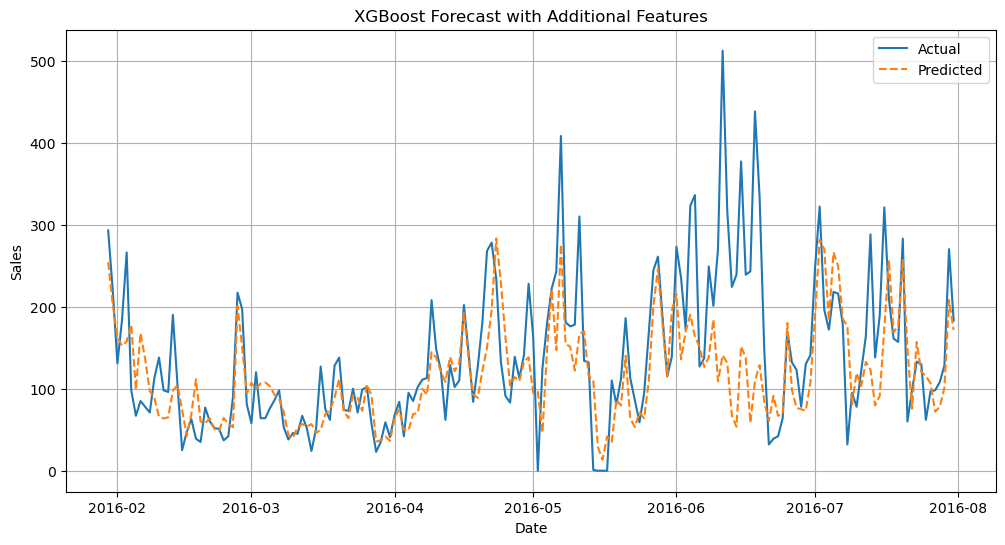

In [5]:
# Import necessary libraries
import pandas as pd                      # For data manipulation and analysis
import numpy as np                       # For numerical computations
from xgboost import XGBRegressor         # XGBoost model for regression
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import mean_squared_error        # For evaluating prediction performance
import matplotlib.pyplot as plt          # For plotting graphs

# Step 1: Load the dataset
df = pd.read_csv("C:/Users/User/Downloads/mock_kaggle.csv")  # Load CSV file
df['data'] = pd.to_datetime(df['data'])                      # Convert date column to datetime format
df = df.sort_values('data')                                  # Sort data chronologically
df.set_index('data', inplace=True)                           # Set the date column as the index

# Step 2: Create lag features (from lag 1 to lag 21)
# These features help the model learn from past values 
for lag in range(1, 22):
    df[f'venda_lag_{lag}'] = df['venda'].shift(lag)

# Step 3: Add rolling statistics (7-day window)
# These features capture short-term trends and seasonality
df['rolling_mean_7'] = df['venda'].rolling(window=7).mean()  # 7-day moving average
df['rolling_std_7'] = df['venda'].rolling(window=7).std()    # 7-day standard deviation

# Step 4: Extract time-based features
# These features capture patterns based on the calendar
df['day_of_week'] = df.index.dayofweek   # Day of the week (0=Monday, 6=Sunday)
df['day'] = df.index.day                 # Day of the month
df['month'] = df.index.month            # Month number

# Step 5: Drop rows with NaN values
# NaNs are caused by shifting (lag features) and rolling operations at the beginning of the series
df.dropna(inplace=True)

# Step 6: Define input features (X) and target variable (y)
features = [col for col in df.columns if col != 'venda']  # Use all columns except the target
X = df[features]  # Predictor variables
y = df['venda']   # Target variable (sales)

# Step 7: Split the dataset into training and testing sets
# We avoid shuffling to maintain the time order
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Step 8: Train the XGBoost regression model
model = XGBRegressor(
    n_estimators=100,          # Number of boosting rounds (trees)
    learning_rate=0.1,         # Step size shrinkage
    objective='reg:squarederror'  # Regression objective function
)
model.fit(X_train, y_train)    # Train the model using training data

# Step 9: Predict and evaluate performance
y_pred = model.predict(X_test)    # Predict on the test set

#y_pred.to_csv("C:/Users/User/Downloads/xgboost_predictions.csv")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))            # Calculate RMSE
print(f'XGBoost with all features RMSE: {rmse:.2f}')          # Display the result

# Step 10: Visualize the results
plt.figure(figsize=(12, 6))                                   # Set figure size
plt.plot(y_test.index, y_test.values, label='Actual')         # Plot actual sales
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')  # Plot predicted sales
plt.title('XGBoost Forecast with Additional Features')        # Title of the plot
plt.xlabel('Date')                                            # X-axis label
plt.ylabel('Sales')                                           # Y-axis label
plt.legend()                                                  # Show legend
plt.grid(True)                                                # Add gridlines
plt.show()                                                    # Display the plot


In [7]:
# Combine predictions and actual values into a DataFrame
predictions_df = pd.DataFrame({
    'Date': y_test.index,         # Dates from the index
    'Actual': y_test.values,      # Actual sales values
    'Predicted': y_pred           # Predicted sales from XGBoost
})

# Set 'Date' as the index (optional, for clean formatting)
predictions_df.set_index('Date', inplace=True)

# Export to CSV
predictions_df.to_csv("C:/Users/User/Downloads/xgboost_predictions.csv")

# (Optional) Print first few rows
print(predictions_df.head())


            Actual   Predicted
Date                          
2016-01-30     293  254.200134
2016-01-31     219  202.028015
2016-02-01     131  162.779480
2016-02-02     184  152.392166
2016-02-03     266  157.521057
